In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.sans-serif"] = ["SimHei"]  #设置字体
plt.rcParams["axes.unicode_minus"] = False  #该语句解决图像中的“-”负号的乱码问题

#读取数据
data_train = pd.read_csv('train.csv')  #读取数据
data_train.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 一、数据探索·:----------info/describe

In [3]:
data_train.info()
data_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


接下来分析幸存情况（Survived）受舱位等级（Pclass）、名字（Name）、性别（Sex）、年龄（Age）、兄弟姐妹（SibSp）、父母（Parch）、船票号码（Ticket）、票价（Fare）、船舱号（Cabin）、上船港口（Embarked）因素中哪些的影响。

## 二、数据特征初步分析

### 2.1 乘客各属性分布----可视化

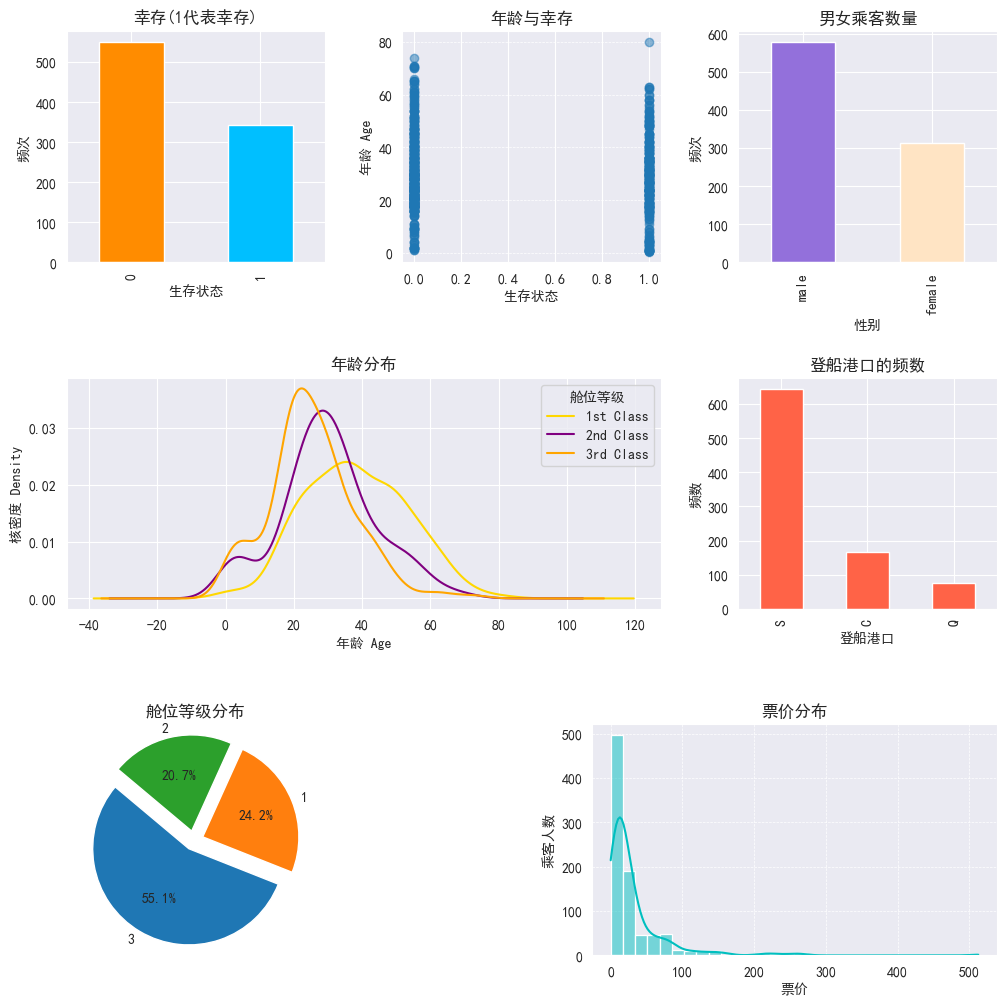

In [4]:
fig = plt.figure(figsize=(12, 12))  # 设置画布大小
fig.set(alpha=0.2)  # 设定图表颜色alpha参数


# 第一个子图：Survived 柱状图
plt.subplot2grid((3, 3), (0, 0))
data_train.Survived.value_counts().plot(kind='bar',
                                        color=['darkorange', 'deepskyblue'])
plt.title('幸存(1代表幸存)')
plt.ylabel('频次')
plt.xlabel('生存状态')
plt.grid(True)

# 第二个子图：Survived by Age 散点图
plt.subplot2grid((3, 3), (0, 1))
plt.scatter(data_train.Survived, data_train.Age, alpha=0.5)
plt.ylabel('年龄 Age')
plt.grid(axis='y', which='major', linestyle='--', linewidth=0.5)
plt.title('年龄与幸存')
plt.xlabel('生存状态')
plt.grid(True)

# 第三个子图：sex 柱状图
plt.subplot2grid((3,3),(0,2))
data_train.Sex.value_counts().plot(kind='bar', color=['mediumpurple','bisque'])
plt.ylabel('频次')
plt.title('男女乘客数量')
plt.xlabel('性别')
plt.grid(True)

# 第四个子图：Age 分布密度图
plt.subplot2grid((3, 3), (1, 0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde', color='gold', label='1st Class')
data_train.Age[data_train.Pclass == 2].plot(kind='kde', color='purple', label='2nd Class')
data_train.Age[data_train.Pclass == 3].plot(kind='kde', color='orange', label='3rd Class')
plt.xlabel('年龄 Age')
plt.ylabel('核密度 Density')
plt.title('年龄分布')
plt.legend(title='舱位等级')
plt.grid(True)

# 第五个子图：Embarked 柱状图
plt.subplot2grid((3, 3), (1, 2))
data_train.Embarked.value_counts().plot(kind='bar', color='tomato')
plt.title('登船港口的频数')
plt.xlabel('登船港口')
plt.ylabel('频数')
plt.grid(True)


# 第六个子图：Pclass 饼状图
plt.subplot2grid((3, 3), (2, 0))
pclass_counts = data_train.Pclass.value_counts()
explode = (0.1, 0.1, 0.1)  
plt.pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('舱位等级分布')
plt.axis('equal')

# 第七个子图：票价分布
plt.subplot2grid((3, 2), (2, 1), colspan=2, rowspan=1)
# 绘制票价的直方图和KDE曲线
sns.histplot(data_train['Fare'], bins=30, kde=True, color='c')
plt.title('票价分布')
plt.xlabel('票价', fontsize=10)
plt.ylabel('乘客人数', fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()

* 从幸存情况的柱状图上可以看出来，被救的人300多点，死亡人数明显多于存活人数，说明幸存与否确实收到上述十个因素中某些因素的影响;   
* 从年龄与幸存情况的散点图可以知道年龄为影响幸存的因素之一
* 从性别与幸存情况的柱状图可以知道女性存活人数比男性多
* 3等舱乘客灰常多;遇难和获救的人年龄似乎跨度都很广;   
* 3个不同的舱年龄总体趋势似乎也一致，2/3等舱乘客20岁多点的人最多，1等舱40岁左右的最多;   
* 登船港口人数按照S、C、Q递减，而且S远多于另外俩港口。  
    
会有一些想法了:   
不同舱位/乘客等级可能和财富/地位有关系，最后获救概率可能会不一样  
年龄对获救概率也一定是有影响的  
和登船港口是不是有关系呢?也许登船港口不同，人的出身地位不同?   
* 接下来详细看看这些属性值的统计分布。   

### 2.2 属性与获救结果的关联统计

#### 2.2.1看看各乘客等级的获救情况

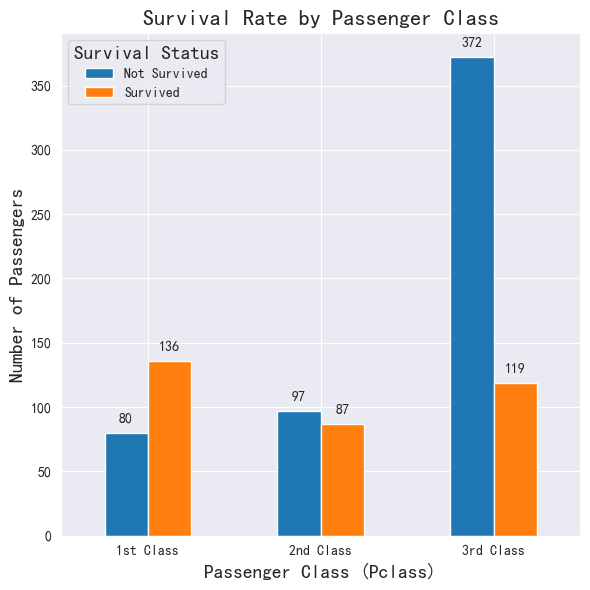

In [5]:
#2.2.1看看各乘客等级的获救情况

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()

df = pd.DataFrame({'Not Survived': Survived_0, 'Survived': Survived_1})
fig, ax = plt.subplots(figsize=(6, 6))
df.plot(kind='bar', ax=ax, width=0.5)
plt.title('Survival Rate by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class (Pclass)', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)
ax.set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation=0)
ax.legend(title='Survival Status', title_fontsize='14')
plt.grid(True)
plt.tight_layout()

# 在每个柱形顶部添加数据标签
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')
plt.show()

从上图可以看出：明显等级为1的乘客获救的概率高很多。   
所以有理由相信：“等级Pclass”一定是影响最后获救结果的一个特征。

#### 2.2.2查看各性别的获救情况

<Figure size 640x480 with 0 Axes>

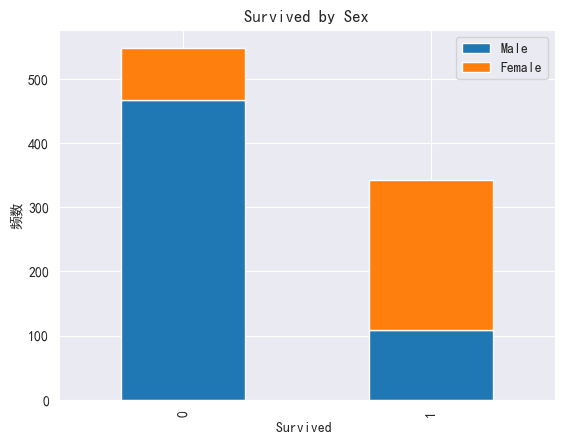

In [6]:
#2.2.2查看各性别的获救情况
fig =plt.figure()#设定图表颜色alpba参数
fig.set(alpha=0.2)

Survived_m= data_train.Survived[data_train.Sex =='male'].value_counts() # 男性的获救情况
Survived_f= data_train.Survived[data_train.Sex == 'female'].value_counts() # 女性的获救情况
df=pd.DataFrame({ 'Male':Survived_m,'Female':Survived_f})
df.plot (kind= 'bar' , stacked=True)
plt.title( 'Survived by Sex')
plt.xlabel('Survived ')
plt.ylabel('频数')
plt.grid(True)
plt.show()

从上图可以看出：女性中被获救的比例更高。   
由此我们认为：“性别"也是决定最终是否被获救的重要特征，应该加入模型中。

#### 2.2.3查看各种舱级别情况下各性别的获救情况

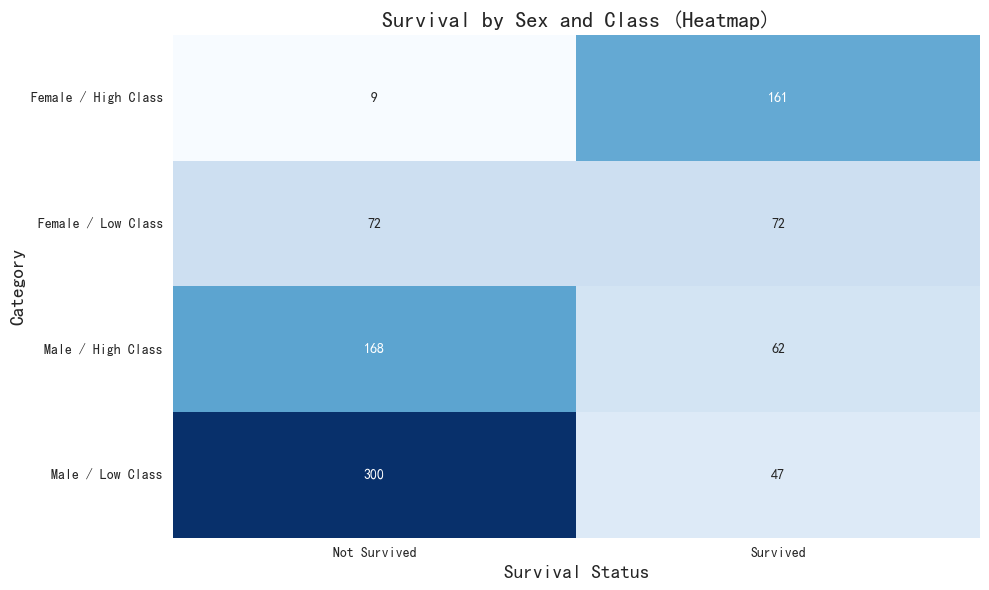

In [12]:

plt.figure(figsize=(10, 6))
# 计算每个类别的生存和未生存数量
data_female_high = data_train.Survived[(data_train.Sex == 'female') & (data_train.Pclass != 3)].value_counts().sort_index()
data_female_low = data_train.Survived[(data_train.Sex == 'female') & (data_train.Pclass == 3)].value_counts().sort_index()
data_male_high = data_train.Survived[(data_train.Sex == 'male') & (data_train.Pclass != 3)].value_counts().sort_index()
data_male_low = data_train.Survived[(data_train.Sex == 'male') & (data_train.Pclass == 3)].value_counts().sort_index()

# 确保所有类别的生存状态包含两个值 (0, 1)，并填充为零以防止遗漏
categories = ['Female / High Class', 'Female / Low Class', 'Male / High Class', 'Male / Low Class']
not_survived = [data_female_high.get(0, 0), data_female_low.get(0, 0), data_male_high.get(0, 0), data_male_low.get(0, 0)]
survived = [data_female_high.get(1, 0), data_female_low.get(1, 0), data_male_high.get(1, 0), data_male_low.get(1, 0)]


survival_data = pd.DataFrame({
    'Survived': not_survived + survived,  # 合并未生存和生存的数据
    'Category': categories * 2,  # 重复类别标签
    'Status': ['Not Survived', 'Not Survived', 'Not Survived', 'Not Survived', 'Survived', 'Survived', 'Survived', 'Survived']  # 标明生存状态
})
survival_data_counts = survival_data.groupby(['Category', 'Status'])['Survived'].sum().unstack(fill_value=0)
sns.heatmap(survival_data_counts, annot=True, cmap="Blues", fmt="g", cbar=False)
plt.title('Survival by Sex and Class (Heatmap)', fontsize=16, fontweight='bold')
plt.ylabel('Category', fontsize=14)
plt.xlabel('Survival Status', fontsize=14)
plt.tight_layout()
plt.show()

故不同级别的舱位（Pclass）会对幸存情况有所影响

#### 2.2.4 查看各登船港口的获救情况

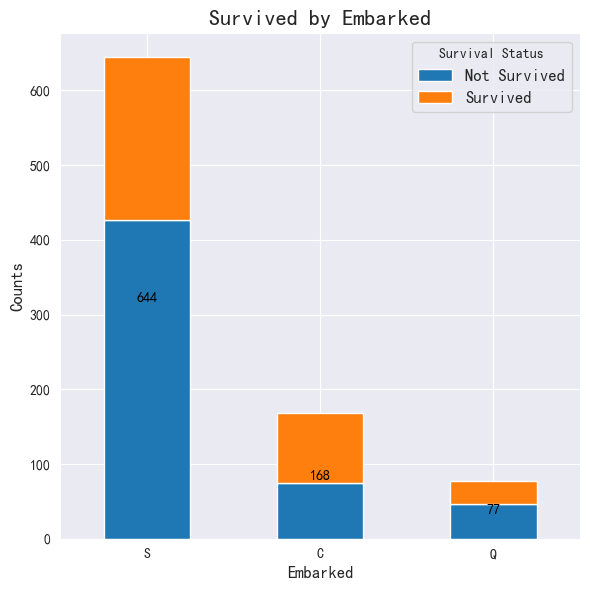

In [8]:
# 2.2.4 查看各登船港口的获救情况
Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df = pd.DataFrame({'Not Survived': Survived_0, 'Survived': Survived_1})
fig, ax = plt.subplots(figsize=(6, 6))
df.plot(kind='bar', stacked=True, ax=ax)
for i, (label, row) in enumerate(df.iterrows()):
    ax.text(i, row.sum() / 2, f'{row.sum()}', ha='center', va='center', color='black', fontsize=10)
ax.set_title('Survived by Embarked', fontsize=16)
ax.set_xlabel('Embarked', fontsize=12)
ax.set_ylabel('Counts', fontsize=12)
plt.xticks(rotation=0)
ax.legend(title='Survival Status', fontsize=12)
plt.tight_layout()
plt.grid(True)
plt.show()


不同港口死亡与幸存的比例并不相同，所以幸存与港口也有关系

#### 2.2.5查看堂兄弟/妹，孩子/父母有几人，对是否获救的影响

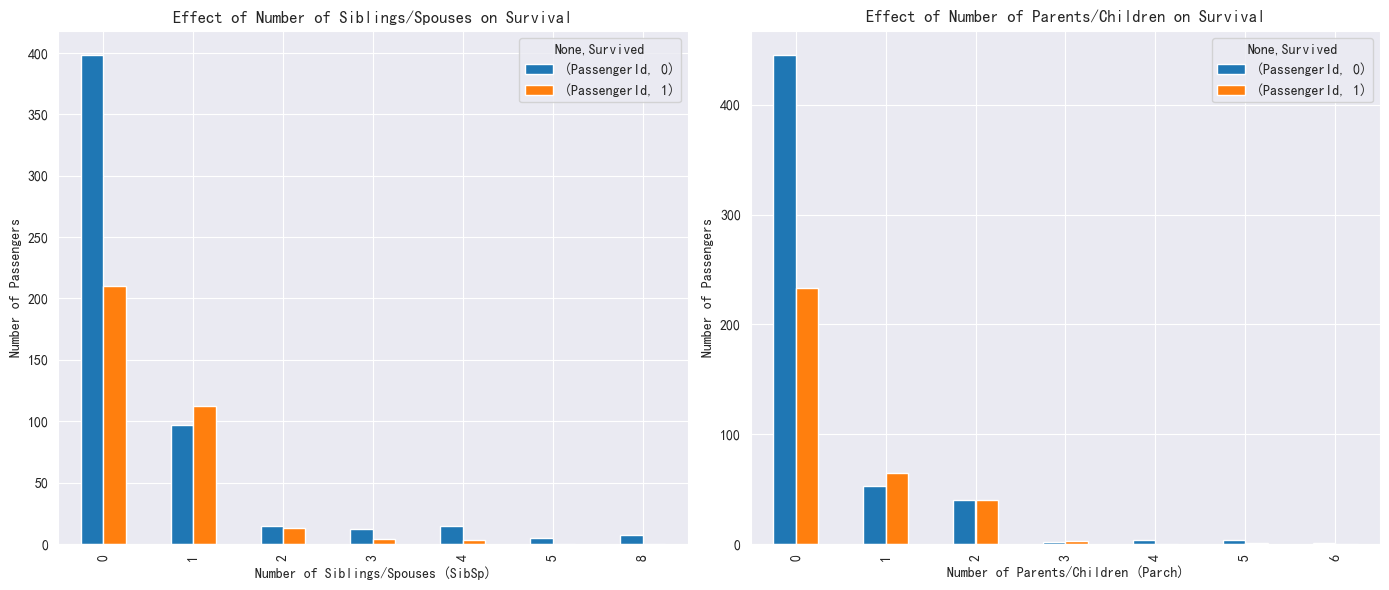

In [9]:
# 查看堂兄弟/妹，孩子/父母有几人，对是否获救的影响
gg = data_train.groupby(['SibSp', 'Survived'])
df_sibsp = pd.DataFrame(gg.count()['PassengerId'])

gp = data_train.groupby(['Parch', 'Survived'])
df_parch = pd.DataFrame(gp.count()['PassengerId'])

# 绘制柱状图
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 堂兄弟/妹
df_sibsp.unstack().plot(kind='bar', ax=axes[0])
axes[0].set_title('Effect of Number of Siblings/Spouses on Survival')
axes[0].set_xlabel('Number of Siblings/Spouses (SibSp)')
axes[0].set_ylabel('Number of Passengers')
axes[0].grid(True)

# 孩子/父母
df_parch.unstack().plot(kind='bar', ax=axes[1])
axes[1].set_title('Effect of Number of Parents/Children on Survival')
axes[1].set_xlabel('Number of Parents/Children (Parch)')
axes[1].set_ylabel('Number of Passengers')
axes[1].grid(True)

plt.tight_layout()
plt.show()

没看出特别特别明显的规律，先作为备选特征，放一放，避免模型过拟合。

#### 2.2.6 tickets cabin的分析

In [10]:
#2.2.6 tickets cabin的分析
'''
ticket是船票编号，应该是unique的，
和最后的结果没有太大的关系，先不纳入考虑的特征范畴,
cabin只有204个乘客有值，我们先看看它的一个分布:
'''
data_train.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

ticket是船票编号，应该是unique的，和最后的结果没有太大的关系，先不纳入考虑的特征范畴,避免使模型过拟合

从上面的结果看不出什么规律，数据也不够集中，如果直接按照类目特征处理的话，太散了，    
估计每个因子化后的特征都拿不到什么权重。   
加上有那么多缺失值，所以可以先把Cabin缺失与否作为条件去查看Survived的情况。     

#### 2.2.7 查看在有无Cabin信息这个粗粒度上Survived的情况

<Figure size 640x480 with 0 Axes>

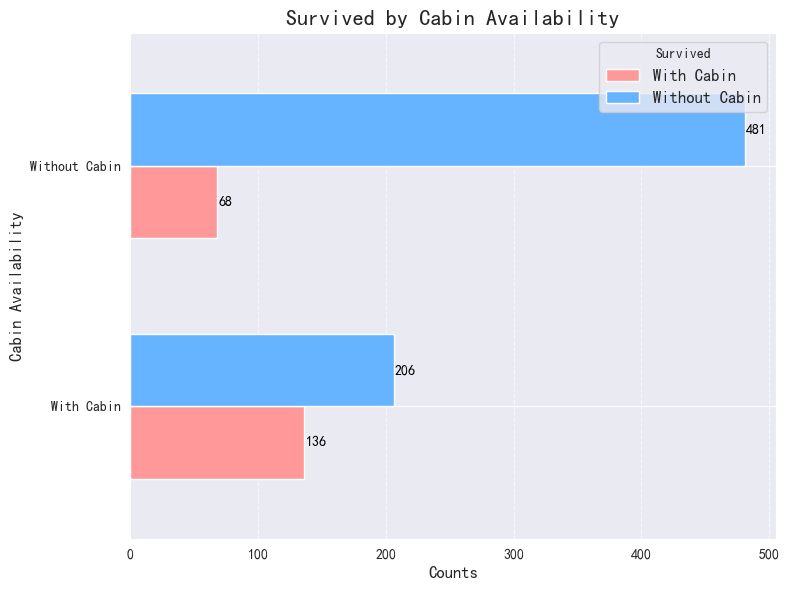

In [13]:
#2.2.7 查看在有无Cabin信息这个粗粒度上Survived的情况
fig= plt.figure()
fig.set(alpha=0.2)
Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts().reindex([1, 0], fill_value=0)
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts().reindex([1, 0], fill_value=0)
df = pd.DataFrame({'With Cabin': Survived_cabin, 'Without Cabin': Survived_nocabin})
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['#ff9999','#66b3ff']
bars = df.plot(kind='barh', ax=ax, color=colors, width=0.6)
for bar in bars.patches:
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}',
            ha='left', va='center', color='black', fontsize=10)
ax.set_title('Survived by Cabin Availability', fontsize=16)
ax.set_xlabel('Counts', fontsize=12)
ax.set_ylabel('Cabin Availability', fontsize=12)
ax.set_yticklabels(['With Cabin', 'Without Cabin'])
ax.legend(title='Survived', fontsize=12, loc='upper right')
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

从图中看，有Cabin记录的似乎获救概率高一些，所以可以将Cabin这个特征处理成“有无Cabin”

#### 2.2.8 Name的分析

<Axes: xlabel='Title'>

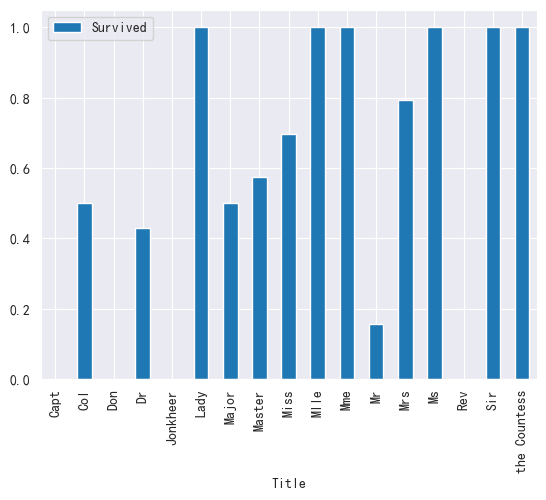

In [14]:
# 不同称呼的生存率
data_train_try = data_train.copy()
data_train_try['Title'] = data_train_try['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip())
pd.crosstab(data_train_try['Title'],data_train_try['Sex'])
data_train_try[['Title', 'Survived']].groupby('Title').mean().plot(kind='bar')


由上述知，称呼对获救概率有影响，若是将不常见的称呼归为“rare”一类可能对构建模型更好

#### 2.2.9 Fare分析



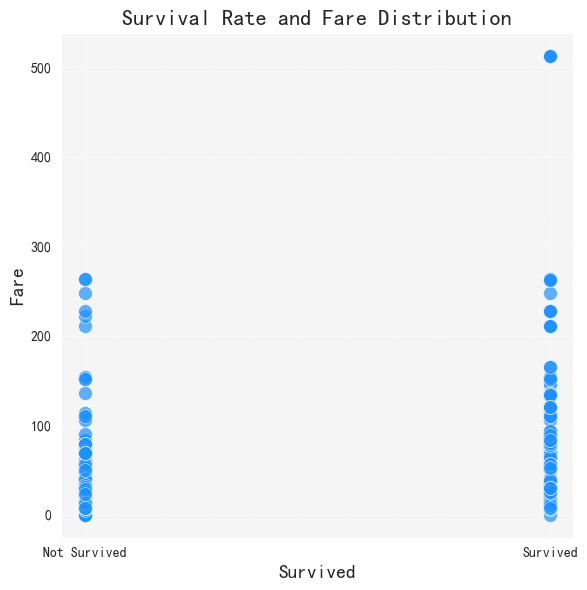

In [16]:
# # 票价分布情况
plt.figure(figsize=(6, 6))
plt.scatter(data_train['Survived'], data_train['Fare'], 
            alpha=0.7, edgecolors='w', linewidth=0.5, 
            s=100, color='dodgerblue')
plt.title('Survival Rate and Fare Distribution', fontsize=16)
plt.xlabel('Survived', fontsize=14)
plt.ylabel('Fare', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.gca().set_facecolor('whitesmoke')
plt.tight_layout()
plt.show()

乘客的数值幅度变化大，这对于模型收敛速度有很大的影响，所以我们可以对这些特征值做归一化处理，将其标准化化到【-1，1】之间


#### 2.3 绘制相关系数的热力图

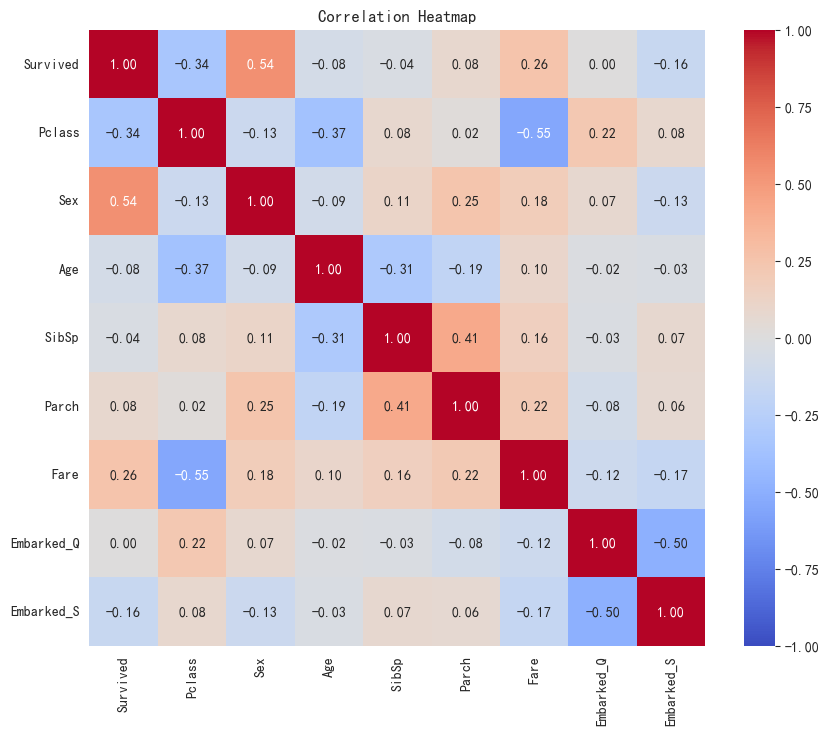

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 提取数据中的相关列
data_try = data_train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()

# 处理分类变量
data_try['Sex'] = data_try['Sex'].map({'male': 0, 'female': 1})  # 将性别转换为数值
data_try = pd.get_dummies(data_try, columns=['Embarked'], drop_first=True)  # 将登船港口独热编码


# 计算相关系数矩阵
correlation_matrix = data_try.corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

综上所述，选择舱位等级（Pclass）、名字（Name）、性别（Sex）、年龄（Age）、有无船舱号（Cabin）、上船港口（Embarked）作为影响模型的因素。

## 三、数据处理

In [18]:
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

### 3.0 准备函数处理Cabin、Name、Age列

In [19]:
from sklearn.ensemble import RandomForestRegressor

### 使用RandomForestClassifier填补缺失的年龄属性
def set_missing_ages(df):
    #把已有的数值型特征取出来丢进RandomForestRegressor中
    age_df = df[['Age','Fare','Parch','SibSp','Pclass']]
    #乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].values
    unknown_age =age_df[age_df.Age.isnull()].values
    #y即目标年龄
    y=known_age[:,0]
    #X即特征属性值
    X=known_age[:,1:]
    #fit到RandomForestRegressor之中
    rfr =RandomForestRegressor(random_state=0,n_estimators=2000,n_jobs=-1)
    rfr.fit(X, y)
    #用得到的模型进行未知年龄结果预测
    predictedAges =rfr.predict(unknown_age[:,1::])
    #用得到的预测结果填补原缺失数据
    df.loc[(df.Age.isnull()),'Age']=predictedAges
    return df, rfr

#将有Cabin记录的替换成“yes”，将无Cabin记录的替换成“no”
def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()),'Cabin']="Yes"
    df.loc[(df.Cabin.isnull()),'Cabin']="No"
    return df

# 提取称谓并更新 Name 列的函数
def extract_titles(df):
    # 更新 Name 列: 根据条件替换称谓
    df['Name'] = df['Name'].apply(
        lambda x: 'Miss' if ('Miss' in x or 'Ms' in x or 'Mlle' in x) else
        'Mrs' if ('Mme' in x or 'Mrs' in x) else
        'Mr' if 'Mr' in x else
        'Rare'  # 所有其他情况
    )
    return df

# 准备使用 “标准差标准化” 进行标准化
import sklearn.preprocessing as preprocessing
scaler =preprocessing.StandardScaler()

### 3.1 处理训练集数据

In [21]:
# 处理训练集数据
data_train = pd.read_csv('data\\大作业数据\\train.csv')#读取数据
print(f"原始数据：\n{data_train.head(30)}\n")

# 数据清理和特征工程
data_train = extract_titles(data_train)
data_train,rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)
print(f"填补年龄、处理Cabin、处理Name后的数据：\n{data_train.head(30)}\n")

# 创建虚拟变量
dummies_Cabin =pd.get_dummies(data_train['Cabin'],prefix='Cabin')
dummies_Embarked=pd.get_dummies(data_train['Embarked'],prefix='Embarked')
dummies_Sex =pd.get_dummies(data_train['Sex'],prefix='Sex')
dummies_Pclass =pd.get_dummies(data_train['Pclass'],prefix='Pclass')
dummies_Name =pd.get_dummies(data_train['Name'],prefix='Name')

# 合并数据框并去掉原来的分类特征列
df=pd.concat([data_train,dummies_Cabin,dummies_Embarked,dummies_Sex,dummies_Pclass,dummies_Name],axis=1)
df.drop(['Pclass','Sex','Ticket','Cabin','Embarked','Name'],axis=1,inplace=True)
print(f"在上个处理的基础上，加入虚拟变量并去除冗余特征后的数据：\n{df.head()}\n")

## 标准化处理
age_scale_param = scaler.fit(df['Age'].values.reshape(-1,1))
df['Age_scaled']= scaler.fit_transform(df['Age'].values.reshape(-1,1),age_scale_param)
fare_scale_param = scaler.fit(df['Fare'].values.reshape(-1,1))
df['Fare_scaled']=scaler.fit_transform(df['Fare'].values.reshape(-1,1),fare_scale_param)
print(f"将处理好的数据的Age和Fare列进行标准化处理后的数据：\n{df.head()}\n")

## 提取X_train y_train
train_df = df.filter(regex= 'Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*|Name_.*')
train_np = train_df.values

X_train = train_np[:, 1:]
y_train = train_np[:,0].astype(int)


原始数据：
    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   
20           21         0       2   
21           22         1       2   
22           23         1       3   
23           24         1       1   
24           25         0       3   
25           26         1       

### 3.2 用同样的方法处理测试集数据

In [23]:
# 处理测试集数据
data_test =pd.read_csv("data//大作业数据//test.csv")
data_test.loc[(data_test.Fare.isnull()),'Fare']=0

# 数据清理和特征工程
data_test =set_Cabin_type(data_test)
data_test,rfr = set_missing_ages(data_test)
data_test = extract_titles(data_test)

# 创建虚拟变量
dummies_Cabin =pd.get_dummies(data_test['Cabin'],prefix='Cabin')
dummies_Embarked =pd.get_dummies(data_test['Embarked'],prefix='Embarked')
dummies_Sex =pd.get_dummies(data_test['Sex'],prefix='Sex')
dummies_Pclass =pd.get_dummies(data_test['Pclass'],prefix='Pclass')
dummies_Name =pd.get_dummies(data_test['Name'],prefix='Name')

# 合并数据框并去掉原来的分类特征列
df_test =pd.concat([data_test, dummies_Cabin,dummies_Embarked,dummies_Sex, dummies_Pclass,dummies_Name],axis=1)
df_test.drop(['Pclass','Name','Sex','Ticket','Cabin','Embarked'],axis=1,inplace=True)
print(f"在上个处理的基础上，加入虚拟变量并去除冗余特征后的数据：\n{df_test.head()}\n")

## 标准化处理
df_test['Age_scaled']= scaler.fit_transform(df_test['Age'].values.reshape(-1,1),age_scale_param)
df_test['Fare_scaled']=scaler.fit_transform(df_test['Fare'].values.reshape(-1,1),fare_scale_param)
print(f"将处理好的数据的Age和Fare列进行标准化处理后的数据：\n{df_test.head()}\n")

## 提取 X_test
X_test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare._*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*|Name_.*').values

在上个处理的基础上，加入虚拟变量并去除冗余特征后的数据：
   PassengerId   Age  SibSp  Parch     Fare  Cabin_No  Cabin_Yes  Embarked_C  \
0          892  34.5      0      0   7.8292      True      False       False   
1          893  47.0      1      0   7.0000      True      False       False   
2          894  62.0      0      0   9.6875      True      False       False   
3          895  27.0      0      0   8.6625      True      False       False   
4          896  22.0      1      1  12.2875      True      False       False   

   Embarked_Q  Embarked_S  Sex_female  Sex_male  Pclass_1  Pclass_2  Pclass_3  \
0        True       False       False      True     False     False      True   
1       False        True        True     False     False     False      True   
2        True       False       False      True     False      True     False   
3       False        True       False      True     False     False      True   
4       False        True        True     False     False     False      True   

   

## 四、 模型比较选取

### 4.0 准备绘制学习曲线的函数

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 用错误率代表得分
# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
# 定义画学习曲线的函数

def plot_learning_curve(estimator,title,X, y, ylim=None, cv=None,n_jobs=1,train_sizes=np.linspace(.05,1.,20),verbose=0,plot=True):

    train_sizes, train_scores, test_scores = learning_curve(estimator,X, y, cv=cv,n_jobs=n_jobs,train_sizes=train_sizes,verbose=verbose)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std =np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel("训练集样本量")
        plt.ylabel("分数")
        plt.gca().invert_yaxis()
        plt.grid()
        plt.fill_between(train_sizes, train_scores_mean--train_scores_std, train_scores_mean + train_scores_std,alpha=0.1,color='b')
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,alpha=0.1,color='r')
        plt.plot(train_sizes, train_scores_mean,'o-',color='b', label="训练集分数")
        plt.plot(train_sizes, test_scores_mean,'o-',color='r',label="验证集分数")
        plt.legend(loc='best')

        plt. draw()
        plt.gca().invert_yaxis()
        plt.show()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff =(train_scores_mean[-1]+ train_scores_std[-1]) -(test_scores_mean[-1]- test_scores_std[-1])
    return midpoint, diff



### 4.1 交叉验证 + 绘制学习曲线 + ROC曲线

* 可以继续深挖验证猜想。下面绘制学习曲线来判定我们的模型现在所处的状态属于欠拟合还是过拟合状态。

* 一般这样做交叉验证：把train.csv分成两部分，一部分用于训练我们需要的模型，另一部分数据上看我们预测算法的效果    
    
* 每个结果的数组中的值代表了在交叉验证的每一折（fold）中，模型的得分（accuracy 或其他评分标准，取决于cross_val_score的scoring参数）。   
    默认：准确率 (accuracy)    
    accuracy（准确率）   
    precision（精确率）   
    recall （召回率）   
    f1 （F1分数）   
    roc_auc（ROC曲线下的面积）   
* 通过比较这几个模型在不同折叠中的表现，可以更好地评估各个模型的稳定性和预测能力。

学习曲线：      
    
评估模型状态：   
* 欠拟合：如果训练集和验证集的性能都很低且几乎平行，并且都处于较低的得分水平（例如低准确率或高错误率），这表明模型可能过于简单，未能捕捉数据的特征。此时可以考虑增加模型复杂性（如选择更复杂的模型、增加特征等）。
* 过拟合：如果训练集的性能得分很高，但验证集的性能得分明显低于训练集，并且趋于平稳，这提示模型可能已经学习到了训练集中的噪声或局部特征，无法有效地泛化到新数据。此时可以考虑减少模型复杂度（如减少树的深度、增加正则化等）或者使用不同的特征集。

收敛趋势：
* 如果随着样本数量的增加，验证集性能没有明显提高，说明模型已经达到性能瓶颈或饱和。
* 如果训练和验证集曲线都会随着样本数量增加而收敛到一个较好的点，说明增加训练数据是有益的。

不确定性和波动：
* 如果曲线在某些地方波动更大（即标准差更大），这可能意味着在这些样本上模型不稳定，并且可能需要更多数据或不同的样本划分方法。

#### 4.1.0 划分为训练集和验证集

In [25]:
from sklearn.model_selection import train_test_split

# 分割数据为训练集和交叉验证集，按照训练数据与CV数据7:3的比例
split_train, split_cv = train_test_split(train_df, test_size=0.3, random_state=42)

## 提取预测、验证数据
X_train_cross = split_train.values[:, 1:]
y_train_cross = split_train.values[:, 0].astype(int)

X_cv_cross = split_cv.values[:, 1:]
y_cv_cross = split_cv.values[:, 0].astype(int)



#### 4.1.1 画ROC曲线

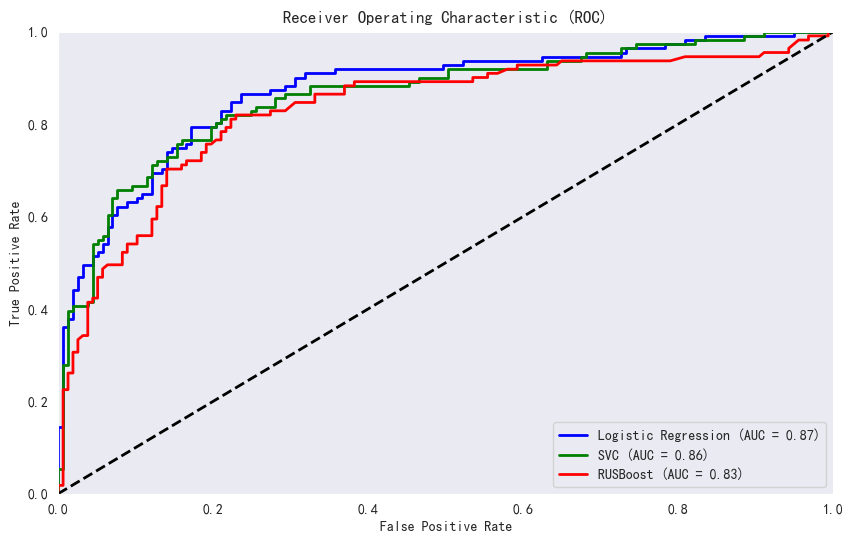

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from imblearn.ensemble import RUSBoostClassifier
# 逻辑回归
clf_logistic = linear_model.LogisticRegression(solver='liblinear', C=1.0, penalty='l1', tol=1e-6, max_iter=200)
clf_logistic.fit(X_train_cross, y_train_cross)

# 预测概率
y_pred_proba_logistic = clf_logistic.predict_proba(X_cv_cross)[:, 1]

# 计算ROC曲线
fpr_logistic, tpr_logistic, _ = roc_curve(y_cv_cross, y_pred_proba_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# SVC模型
clf_svc = svm.SVC(C=1.0, kernel='linear', gamma='scale', tol=1e-6, probability=True)
clf_svc.fit(X_train_cross, y_train_cross)

# 预测概率
y_pred_proba_svc = clf_svc.predict_proba(X_cv_cross)[:, 1]

# 计算ROC曲线
fpr_svc, tpr_svc, _ = roc_curve(y_cv_cross, y_pred_proba_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# RUSBoost模型
clf_rusboost = RUSBoostClassifier(n_estimators=100, learning_rate=1.0)
clf_rusboost.fit(X_train_cross, y_train_cross)

# 预测概率
y_pred_proba_rusboost = clf_rusboost.predict_proba(X_cv_cross)[:, 1]

# 计算ROC曲线
fpr_rusboost, tpr_rusboost, _ = roc_curve(y_cv_cross, y_pred_proba_rusboost)
roc_auc_rusboost = auc(fpr_rusboost, tpr_rusboost)

# 绘制ROC曲线
plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_logistic))
plt.plot(fpr_svc, tpr_svc, color='green', lw=2, label='SVC (AUC = {:.2f})'.format(roc_auc_svc))
plt.plot(fpr_rusboost, tpr_rusboost, color='red', lw=2, label='RUSBoost (AUC = {:.2f})'.format(roc_auc_rusboost))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

由上述图无法清晰判断模型优劣，下面选择使用学习曲线判断

#### 4.2.1 逻辑回归

[0.792      0.888      0.808      0.82258065 0.85483871]


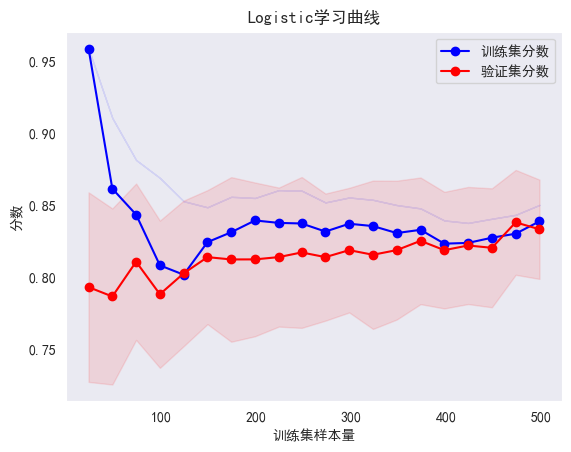

(0.8243203735877914, 0.051271011164301994)

In [27]:
from sklearn.model_selection import cross_val_score

# 逻辑回归打分
print(cross_val_score(clf_logistic,X_train_cross,y_train_cross,cv=5))

# 预测结果
predictions =clf_logistic.predict(X_cv_cross)

# 绘制学习曲线
plot_learning_curve(clf_logistic, "Logistic学习曲线", X_train_cross, y_train_cross)

#### 4.2.2 SVC

[0.776      0.872      0.76       0.81451613 0.83870968]


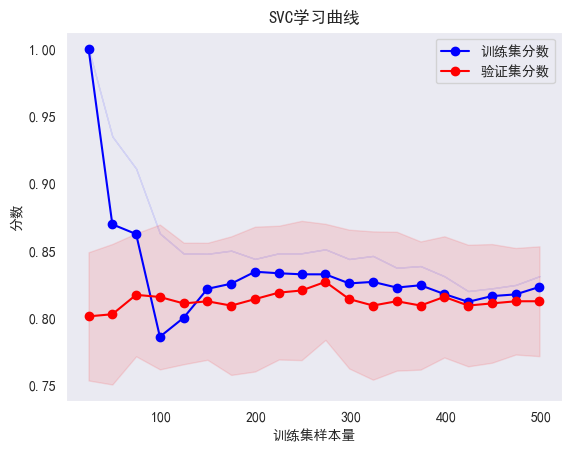

(0.8011588054768244, 0.059408841448985394)

In [29]:
from sklearn.model_selection import cross_val_score

# SVM打分
print(cross_val_score(clf_svc,X_train_cross,y_train_cross,cv=5))

# 预测结果
predictions =clf_svc.predict(X_cv_cross)

# 绘制学习曲线
plot_learning_curve(clf_svc, "SVC学习曲线", X_train_cross, y_train_cross)

#### 4.2.3 RUSBoost

[0.776      0.824      0.784      0.75806452 0.82258065]


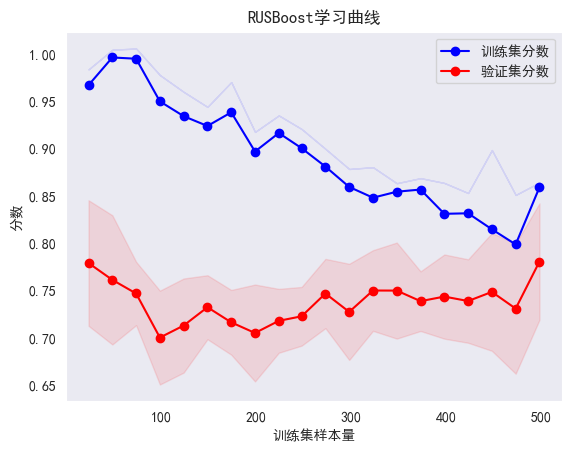

(0.7911865715393701, 0.14524460690256524)

In [30]:
from sklearn.model_selection import cross_val_score

# SVM打分
print(cross_val_score(clf_rusboost,X_train_cross,y_train_cross,cv=5))

# 预测结果
predictions =clf_rusboost.predict(X_cv_cross)

# 绘制学习曲线
plot_learning_curve(clf_rusboost, "RUSBoost学习曲线", X_train_cross, y_train_cross)

目前的曲线看来，我们的SVC和Logistic并不处于过拟合状态（过拟合状态表现一般是训练集得分高，而交叉验证集要低很多，中间的gap比较大）。因此我们可以再做些特征的工作，或者组合特征到模型中。    
下面对SVC和Logistic进行模型研究

### 5.模型预测

#### 5.1 使用LogisticRegression模型

In [31]:
from sklearn import linear_model

# 训练LogisticRegression模型
clf = linear_model.LogisticRegression(solver='liblinear',C=1.0, penalty= 'l1',tol=1e-6, max_iter=200)
clf.fit (X_train,y_train)

# 用训练好的模型预测
predictions =clf.predict(X_test)

# 生成提交文件
result =pd.DataFrame({'PassengerId':data_test['PassengerId'].values,'Survived':predictions.astype(np.int32)})
result.to_csv("submission7138.csv",index=False)

# 查看已经保存的预测结果
result=pd.read_csv("submission7138.csv")

# 计算存活和未存活人数
survival_counts = result['Survived'].value_counts()
print(result.head())
print(survival_counts)

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
Survived
0    260
1    158
Name: count, dtype: int64


#### 5.2 使用SVC模型

In [32]:
from sklearn import svm
import pandas as pd
import numpy as np

# 训练SVC模型
clf = svm.SVC(C=1.0, kernel='linear', gamma='scale', tol=1e-6)

# 使用训练数据拟合模型
clf.fit(X_train, y_train)

# 用训练好的模型进行预测
predictions = clf.predict(X_test)

# 生成提交文件
result = pd.DataFrame({'PassengerId': data_test['PassengerId'].values, 'Survived': predictions.astype(np.int32)})
result.to_csv("submission7138.csv", index=False)

# 查看已经保存的预测结果
result = pd.read_csv("submission7138.csv")

# 计算存活和未存活人数
survival_counts = result['Survived'].value_counts()
print(result.head())
print(survival_counts)

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
Survived
0    250
1    168
Name: count, dtype: int64


#### 5.3 使用RUSBoost模型（同样也尝试下）

In [33]:
import pandas as pd
import numpy as np
from imblearn.ensemble import RUSBoostClassifier

# 创建 RUSBoost 分类器
clf = RUSBoostClassifier(n_estimators=100, learning_rate=1.0)

# 使用训练数据拟合模型
clf.fit(X_train, y_train)

# 用训练好的模型进行预测
predictions = clf.predict(X_test)

# 生成提交文件
result = pd.DataFrame({'PassengerId': data_test['PassengerId'].values, 'Survived': predictions.astype(np.int32)})
result.to_csv("submission7138.csv", index=False)

# 查看已经保存的预测结果
result = pd.read_csv("submission7138.csv")

# 计算存活和未存活人数
survival_counts = result['Survived'].value_counts()
print(result.head())
print(survival_counts)

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0
Survived
0    243
1    175
Name: count, dtype: int64


经过上述尝试，我们发现，Logistic Regression和SVC预测情况不错，但是仍与我们的期望有所差距，故我们选择使用模型融合以及网格搜索进一步优化

### 6. 模型融合

* Bagging算法与其他分类算法结合，能提高准确率、稳定性，同时通过降低结果的方差，避免过拟合的发生。
* 不用全部的训练集，每次取训练集的一个subset，做训练，这样，我们虽然用的是同一个机器学习算法，但是得到的模型却是不一样的；   
* 同时，因为我们没有任何一份子数据集是全的，因此即使出现过拟合，也是在子训练集上出现过拟合，而不是全体数据上，这样做一个融合，可能对最后的结有一定的帮助。   
* 同时加入网格搜索调参，可能能使结果更好
    

## 6.1.1 Bagging（LogisticRegression）

In [36]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.ensemble import BaggingClassifier

# 假设您已经将数据分割为 X_train，y_train 和 X_test，data_test

# 创建逻辑回归分类器
clf = linear_model.LogisticRegression(solver='lbfgs',
                                      C=1.0,
                                      penalty='l2',
                                      tol=1e-6)

# 创建Bagging模型
bagging_clf = BaggingClassifier(estimator=clf,  # 修正为 'estimator' 而不是 'base_estimator'
                                n_estimators=20,
                                max_samples=0.8,
                                max_features=1.0,
                                bootstrap=True,
                                bootstrap_features=False,
                                n_jobs=-1)

# 训练Bagging模型
bagging_clf.fit(X_train, y_train.astype(int))

# 用训练好的模型预测
predictions = bagging_clf.predict(X_test)

# 保存预测结果
result = pd.DataFrame({'PassengerId': data_test['PassengerId'].values, 'Survived': predictions.astype(np.int32)})
result.to_csv("submission7138.csv", index=False)

# 查看已经保存的预测结果
result = pd.read_csv("submission7138.csv")

# 计算存活和未存活人数
survival_counts = result['Survived'].value_counts()
print(result.head())
print(survival_counts)

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
Survived
0    256
1    162
Name: count, dtype: int64


模型结果虽然不错但应该还能通过调整参数提高。进一步使用网格搜索对参数进行调优。

### 6.1.2 Bagging（LogisticRegression）+调参    


In [39]:
from sklearn.ensemble import BaggingClassifier  # 更新为 BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

print(f"在网格搜索中，我们使用LogisticRegression基础模型，并使用BaggingClassifier进行融合，并使用网格搜索进行参数调优。\n")


# 定义LogisticRegression基础模型
base_clf = LogisticRegression(solver='lbfgs', C=1.0, penalty='l2', tol=1e-6)

# 定义BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_clf,
                                n_estimators=20,
                                max_samples=0.8,
                                max_features=1.0,
                                bootstrap=True,
                                n_jobs=-1)

# 定义待调优的参数网格
param_grid = {
    'estimator__C': [0.1, 1.0, 10.0],  # 整个 BaggingClassifier 中基础模型的 C 参数
    'n_estimators': [10, 20, 50],      # Bagging 中的基础学习器数量
    'max_samples': [0.5, 0.8, 1.0],    # 每个基础学习器的样本比例
}

# 使用GridSearchCV进行参数调优
grid_search = GridSearchCV(estimator=bagging_clf,
                           param_grid=param_grid,
                           scoring='accuracy',
                           n_jobs=-1,
                           cv=5)

# 进行训练和调优
grid_search.fit(X_train, y_train)

# 打印最佳参数
print("最佳参数:", grid_search.best_params_)

# 用训练好的模型预测
predictions = grid_search.predict(X_test)

# 保存预测结果
result = pd.DataFrame({'PassengerId': data_test['PassengerId'].values, 'Survived': predictions.astype(np.int32)})
result.to_csv("submission7138.csv", index=False)


# 查看已经保存的预测结果
result=pd.read_csv("submission7138.csv")

# 计算存活和未存活人数
survival_counts = result['Survived'].value_counts()
print(result.head())
print(survival_counts)

在网格搜索中，我们使用LogisticRegression基础模型，并使用BaggingClassifier进行融合，并使用网格搜索进行参数调优。
最佳参数: {'estimator__C': 0.1, 'max_samples': 1.0, 'n_estimators': 20}
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
Survived
0    263
1    155
Name: count, dtype: int64


#### 6.2.1 Bagging（SVC）

In [35]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split


# 创建支持向量分类器
clf = SVC(kernel='linear', probability=True)  # 加上 probability=True 以便获取预测概率

# 创建Bagging模型
bagging_clf = BaggingClassifier(clf,
                                n_estimators=20,
                                max_samples=0.8,
                                max_features=1.0,
                                bootstrap=True,
                                bootstrap_features=False,
                                n_jobs=-1)

# 训练Bagging模型
bagging_clf.fit(X_train, y_train.astype(int))

# 用训练好的模型预测
predictions = bagging_clf.predict(X_test)

# 保存预测结果
result = pd.DataFrame({'PassengerId': data_test['PassengerId'].values, 'Survived': predictions.astype(np.int32)})
result.to_csv("submission7138.csv", index=False)

# 查看已经保存的预测结果
result = pd.read_csv("submission7138.csv")

# 计算存活和未存活人数
survival_counts = result['Survived'].value_counts()
print(result.head())
print(survival_counts)

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
Survived
0    254
1    164
Name: count, dtype: int64


#### 6.2.2 Bagging（SVC）+调参

In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC  # 引入 SVC
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

print(f"在网格搜索中，我们使用SVC基础模型，并使用BaggingClassifier进行融合，并使用网格搜索进行参数调优。\n")

# 定义 SVC 基础模型
base_clf = SVC(probability=True)  # 设置 probability=True 以便可以使用 Bagging 时进行概率输出

# 定义 BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_clf,
                                n_estimators=20,
                                max_samples=0.8,
                                max_features=1.0,
                                bootstrap=True,
                                n_jobs=-1)

# 定义待调优的参数网格
param_grid = {
    'estimator__C': [0.1, 1.0, 10.0],  # SVC 中的 C 参数
    'estimator__gamma': ['scale', 'auto'],  # SVC 中的 gamma 参数
    'n_estimators': [10, 20, 50],       # Bagging 中的基础学习器数量
    'max_samples': [0.5, 0.8, 1.0],     # 每个基础学习器的样本比例
}

# 使用 GridSearchCV 进行参数调优
grid_search = GridSearchCV(estimator=bagging_clf,
                           param_grid=param_grid,
                           scoring='accuracy',
                           n_jobs=-1,
                           cv=5)

# 进行训练和调优
grid_search.fit(X_train, y_train)

# 打印最佳参数
print("最佳参数:", grid_search.best_params_)

# 用训练好的模型进行预测
predictions = grid_search.predict(X_test)

# 保存预测结果
result = pd.DataFrame({'PassengerId': data_test['PassengerId'].values, 'Survived': predictions.astype(np.int32)})
result.to_csv("submission7138.csv", index=False)

# 查看已经保存的预测结果
result = pd.read_csv("submission7138.csv")

# 计算存活和未存活人数
survival_counts = result['Survived'].value_counts()
print(result.head())
print(survival_counts)

在网格搜索中，我们使用SVC基础模型，并使用BaggingClassifier进行融合，并使用网格搜索进行参数调优。
最佳参数: {'estimator__C': 1.0, 'estimator__gamma': 'auto', 'max_samples': 1.0, 'n_estimators': 10}
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
Survived
0    257
1    161
Name: count, dtype: int64
